# Crop Recommendation System

In [74]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")
import itertools as it
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import pickle

In [2]:
# loading dataset
df=pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
# columns
columns=df.columns
columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
# separating input features from output
X=df[df.columns[:-1]]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [5]:
# output label
y=df[['label']]
y['label'].replace(y['label'].unique(),range(22),inplace=True)
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [6]:
# storing all crop names
crop_names=df['label'].unique()
crop_names[:6]

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans'], dtype=object)

### Ascending Exhaustive Feature Selection Technique
#### searching minimum number of best features

In [98]:
# all single input features
all_combinations=[]
for i in range(1,8):
    all_combinations.append(list(it.combinations(columns[:-1],i)))
all_combinations[0]

[('N',),
 ('P',),
 ('K',),
 ('temperature',),
 ('humidity',),
 ('ph',),
 ('rainfall',)]

Text(0.5, 1.0, 'Feature selection - 1 feature')

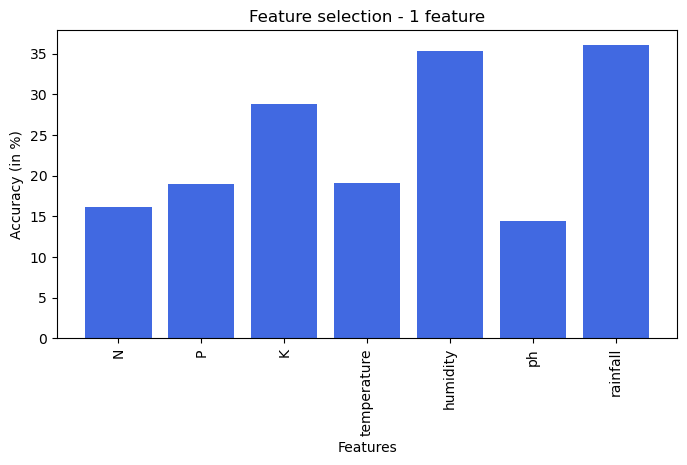

In [94]:
# checking for the best 1 feature
scores=[]
for i in all_combinations[0]:
    X=df[[i[0]]]
    grid=GridSearchCV(RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=9, criterion='entropy'),
                 { },cv=10)
    grid.fit(X,y)
    scores.append(grid.best_score_*100)
    
# visualizing baseline accuracies scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(scores)), scores, color="royalblue")
plt.xticks(range(len(all_combinations[0])),[i[0] for i in all_combinations[0]])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Features")
plt.ylabel("Accuracy (in %)")
plt.title("Feature selection - 1 feature")

Text(0.5, 1.0, 'Feature selection - 2 features')

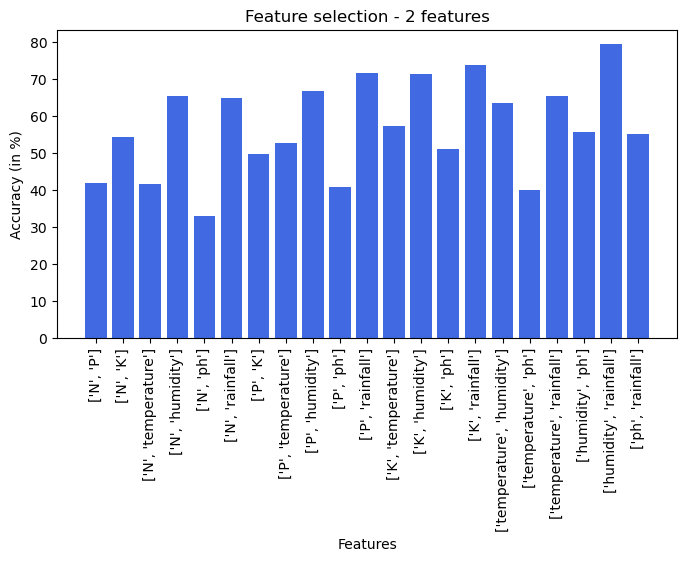

In [100]:
# checking for the best 2 features
scores=[]
for i in all_combinations[1]:
    X=df[list(i)]
    grid=GridSearchCV(RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=9, criterion='entropy'),
                 { },cv=10)
    grid.fit(X,y)
    scores.append(grid.best_score_*100)
    
# visualizing baseline accuracies scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(scores)), scores, color="royalblue")
plt.xticks(range(len(all_combinations[1])),[list(i) for i in all_combinations[1]])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Features")
plt.ylabel("Accuracy (in %)")
plt.title("Feature selection - 2 features")

Text(0.5, 1.0, 'Feature selection - 3 features')

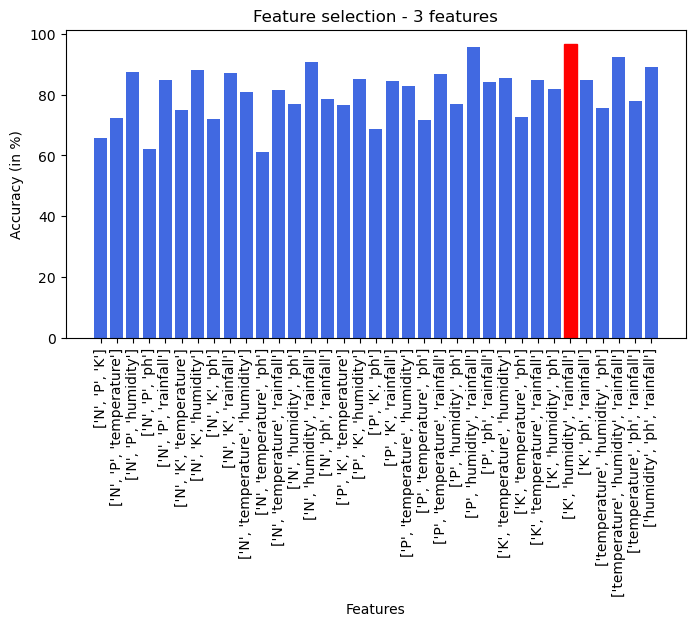

In [104]:
# checking for the best 3 features
scores=[]
for i in all_combinations[2]:
    X=df[list(i)]
    grid=GridSearchCV(RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=9, criterion='entropy'),
                 { },cv=10)
    grid.fit(X,y)
    scores.append(grid.best_score_*100)
    
# visualizing baseline accuracies scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(scores)), scores, color="royalblue")
plt.xticks(range(len(all_combinations[2])),[list(i) for i in all_combinations[2]])
bars[29].set_color("red")
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Features")
plt.ylabel("Accuracy (in %)")
plt.title("Feature selection - 3 features")

#### { 'K', 'humidity', 'rainfall' } are selected as the best input attributes for crop recommendation

In [7]:
X_3=df[['K','humidity','rainfall']]
X_train, X_test, y_train, y_test= train_test_split(X_3, y, random_state=111, stratify=y['label'],
                                                  test_size=0.2)

In [43]:
# model selection
model=[RandomForestClassifier(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
       GaussianNB(), LogisticRegression()]
train_accuracy=[]
test_accuracy=[]
f1=[]
for i in model:
    i.fit(X_train,y_train)
    train_accuracy.append(i.score(X_train,y_train)*100)
    test_accuracy.append(i.score(X_test,y_test)*100)
    f1.append(f1_score(i.predict(X_test), y_test,  average='micro')*100)

Text(0.5, 1.0, 'Model selection')

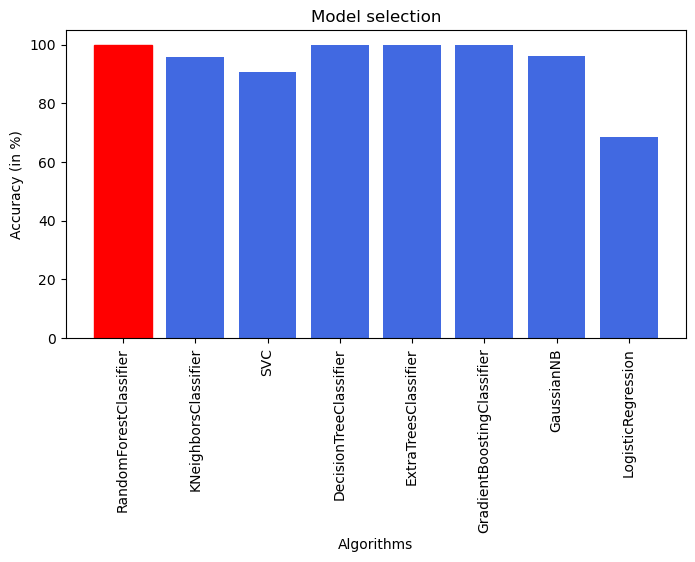

In [45]:
# visualizing training scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(train_accuracy)), train_accuracy, color="royalblue")
bars[0].set_color("red")
plt.xticks(range(len(model)),[str(i)[:-2] for i in model])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (in %)")
plt.title("Model selection")

Text(0.5, 1.0, 'Model selection')

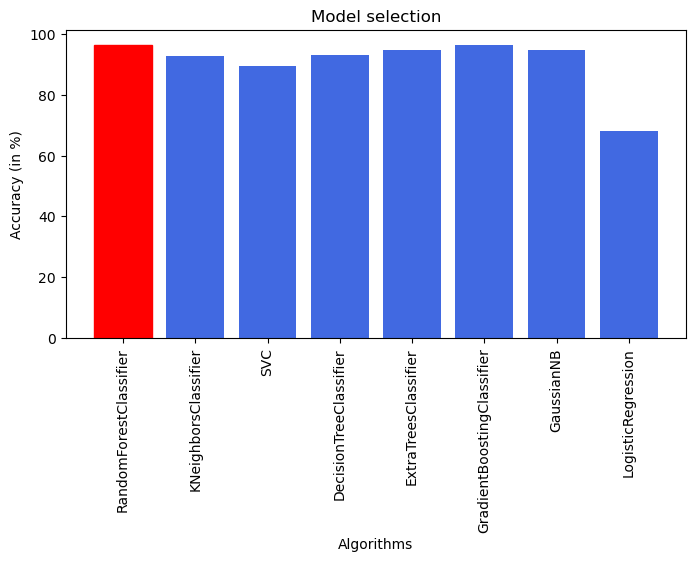

In [46]:
# visualizing testing scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(test_accuracy)), test_accuracy, color="royalblue")
bars[0].set_color("red")
plt.xticks(range(len(model)),[str(i)[:-2] for i in model])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (in %)")
plt.title("Model selection")

Text(0.5, 1.0, 'Model selection')

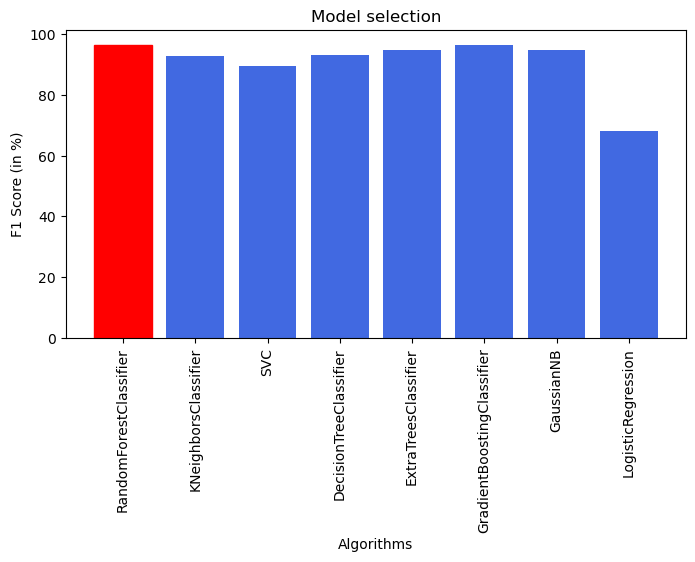

In [47]:
# visualizing f1 scores
plt.figure(figsize=(8,4))
bars=plt.bar(range(len(f1)), f1, color="royalblue")
bars[0].set_color("red")
plt.xticks(range(len(model)),[str(i)[:-2] for i in model])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score (in %)")
plt.title("Model selection")

###### RandomForest Classifier is selected because of good accuracy scores, time and space complexities when compared to other algorithms.

In [49]:
# constructing model architecture
forest=RandomForestClassifier(random_state=111,criterion='gini', max_depth=10
                                        ,n_estimators=500, max_features='sqrt')

In [50]:
# model training
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=111)

In [57]:
# predicting
y_pred= forest.predict(X_test)

In [58]:
print("Training accuracy : ",forest.score(X_train, y_train)*100)
print("Testing accuracy  : ",forest.score(X_test, y_test)*100)
print("F1-score          : ",f1_score(y_test, y_pred, average='micro')*100)

Training accuracy :  97.72727272727273
Testing accuracy  :  97.04545454545455
F1-score          :  97.04545454545455


<Axes: >

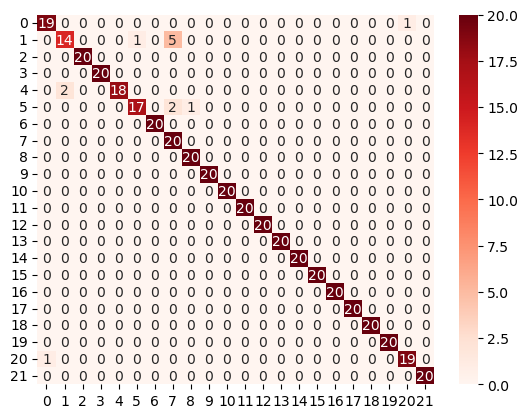

In [59]:
# confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Reds", annot=True)

In [60]:
# saving the model
pickle.dump(forest, open('model.pkl', 'wb'))

In [61]:
# loading the model
pickled_model = pickle.load(open('model.pkl', 'rb'))

## Generating recommendations

In [105]:
print("Recommended crop: ",crop_names[int(pickled_model.predict([[43,82,202]])[0])])

Recommended crop:  rice


In [106]:
print("Recommended crop: ",crop_names[int(pickled_model.predict([[34,34,34]])[0])])

Recommended crop:  mothbeans


In [107]:
print("Recommended crop: ",crop_names[int(pickled_model.predict([[100,30,20]])[0])])

Recommended crop:  muskmelon


# END

# ______________________________________________________________